In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test/255.0

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D (32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D (64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)), # Another Pooling Layer
    keras.layers.Conv2D(64, (3,3), activation='relu'), #Another Convol
    keras.layers.Flatten(), #flattening the output
    keras.layers.Dense(128, activation='relu'), #Fully Connected Layer
    keras.layers.Dense(10, activation='softmax') # Output Layer (10 clo
])
print(model.summary())

C:\Users\veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.8964 - loss: 0.3273 - val_accuracy: 0.9864 - val_loss: 0.0412
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.9829 - val_loss: 0.0485
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9899 - val_loss: 0.0326
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9935 - loss: 0.0192 - val_accuracy: 0.9890 - val_loss: 0.0393
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9909 - val_loss: 0.0314
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9927 - val_loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9965 -

In [10]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9898 - loss: 0.0481
Test accuracy: 0.9926000237464905


In [13]:
import random
#Pick a mandow test image
index = random.randint(0, len(x_test) - 1)
image = x_test[index].reshape(1, 28, 28, 1)

In [14]:
prediction = model.predict(image)
predicted_label= np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


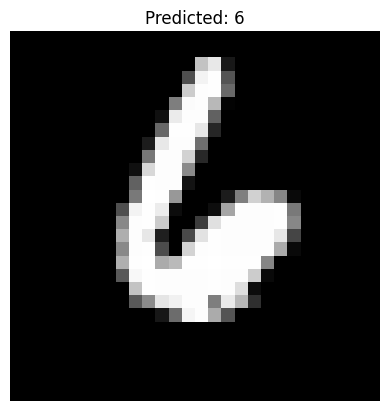

In [15]:
plt.imshow(x_test[index].reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()